# SP4 - Criação do Modelo Supervisionado

## Integrantes

*   **RM 558062** - Henrique Francisco Garcia

*   **RM 557197** - Larissa Mezencio Pereira Muniz

*   **RM 558843** - Laura de Oliveira Cintra



## Análise e Modelo
Após a análise exploratória, treinamos um modelo de classificação. Avaliamos o modelo com acurácia, precisão e recall.

## Passo 1 - Análise do dataset
Nosso dataset contém descrições de problemas mecânicos que um carro pode apresentar. Ele inclui as características do problema e a classe de diagnóstico associada, que serve como a variável alvo. O objetivo é desenvolver um modelo capaz de prever o tipo de falha mecânica a partir das informações apresentadas.

---

In [1]:
## Passo 1: Carregar e Visualizar o Dataset

# Importar bibliotecas necessárias
import pandas as pd

# Carregar o dataset fornecido
file_path = 'carros.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

# Visualizar as primeiras linhas do dataset
dataset.head()


Unnamed: 0 Qual o modelo do seu veículo?  \
0  Resposta 1                   Honda Civic   
1  Resposta 2                Toyota Corolla   
2  Resposta 3                    Ford Focus   
3  Resposta 4                Chevrolet Onix   
4  Resposta 5               Volkswagen Golf   

    Local onde aconteceu o problema?  \
0                   Na minha garagem   
1     No estacionamento do shopping    
2    Em casa, na entrada da garagem    
3               No centro da cidade    
4  Na estrada, a caminho do trabalho   

  Há quanto tempo esse problema começou a acontecer?  \
0                                    Há duas semanas   
1                                        Desde ontem   
2                         Está acontecendo há 3 dias   
3                                    Percebi a 1 mês   
4                                         Faz 5 dias   

  O problema acontece de forma esporádica ou é constante?  \
0                                                  C        
1                                                  E        
2                                                  C        
3                                                  C        
4                                                  E        

  Você ouviu algum barulho estranho vindo do carro?   \
0                                                  S   
1                                                  N   
2                                                  S   
3                                                  N   
4                                                  S   

  O motor perdeu potência em algum momento?  \
0                                       Sim   
1                                       Sim   
2                                       Sim   
3                                       Não   
4                                       Sim   

  Quando foi a última vez que o veículo foi revisado?  \
0                                      Há seis meses    
1                                        Faz um ano     
2         Não lembro exatamento, acho que dois anos     
3                                 No último inverno     
4                               No começo deste ano     

  Você sentiu cheiro de combustível dentro do carro?  \
0                                                Sim   
1                                                Não   
2                                                Sim   
3                                                Sim   
4                                                Não   

  Está com dificuldade para ligar o carro?  \
0                                      Não   
1                                      Não   
2                                      Sim   
3                                      Não   
4                                      Não   

  Alguma luz de aviso no painel está acesa?  \
0                                       Não   
1                                       Sim   
2                                       Sim   
3                                       Sim   
4                                       Sim   

  Você notou algum tipo de fluido vazando embaixo do carro?  \
0                                                Não          
1                                                Não          
2                                                Não          
3                                                Não          
4                                                Sim          

  Qual o problema do seu veículo? Revisão Agendada?  Problema Verificado?  \
0                Barulho no motor                Sim                  Sim   
1             Luz do painel acesa               Não                   Não   
2                  Falha no motor               Não                   Sim   
3              Freios desgastados                Sim                  Sim   
4               Vazamento de óleo                Sim                  Não   

  Manual ou Automático? Tipo do problema (elétrico/ mecânico)  
0        

In [2]:
# Análise exploratória dos dados
print("Resumo das colunas:")
print(dataset.info())

print("\nVerificar valores nulos:")
print(dataset.isnull().sum())

print("\nDistribuição das classes target:")
print(dataset['Tipo do problema (elétrico/ mecânico)'].value_counts())

Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Unnamed: 0                                                 100 non-null    object
 1   Qual o modelo do seu veículo?                              100 non-null    object
 2   Local onde aconteceu o problema?                           100 non-null    object
 3   Há quanto tempo esse problema começou a acontecer?         100 non-null    object
 4   O problema acontece de forma esporádica ou é constante?    100 non-null    object
 5   Você ouviu algum barulho estranho vindo do carro?          100 non-null    object
 6   O motor perdeu potência em algum momento?                  100 non-null    object
 7   Quando foi a última vez que o veículo foi revisado?        100 non-null    object
 8   V

## Passo 2 - Pré-processamento dos Dados

Iremos consolidar todas as colunas de entrada em uma única coluna de texto e, em seguida, transformar esse texto em uma representação numérica por meio do método TF-IDF.

In [4]:


# Concatenar todas as colunas de texto para criar uma representação unificada do problema
dataset['texto_unificado'] = dataset.drop(columns=['Tipo do problema (elétrico/ mecânico)']).apply(lambda x: ' '.join(x.astype(str)), axis=1)
dataset['texto_unificado'].head()

# Separar variáveis independentes (X) e dependentes (y)
X = dataset['texto_unificado']
y = dataset['Tipo do problema (elétrico/ mecânico)']

In [5]:
X.head(), y.head()

(0    Resposta 1 Honda Civic Na minha garagem Há dua...
 1    Resposta 2 Toyota Corolla No estacionamento do...
 2    Resposta 3 Ford Focus Em casa, na entrada da g...
 3    Resposta 4 Chevrolet Onix No centro da cidade ...
 4    Resposta 5 Volkswagen Golf Na estrada, a camin...
 Name: texto_unificado, dtype: object,
 0    Mecânico
 1    Elétrico
 2    Mecânico
 3    Mecânico
 4    Mecânico
 Name: Tipo do problema (elétrico/ mecânico), dtype: object)

## Passo 3 - Vetorização com TF-IDF

Usaremos o TF-IDF para converter o texto em uma representação numérica que pode ser utilizada para treinar o modelo. Vamos experimentar diferentes métodos de vetorização para analisar o desempenho do modelo.

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Henrique\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords

print(stopwords.words('portuguese'))

# Converter os textos em representações TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(X)
print(X_tfidf)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [11]:
# Converter os textos em representações TF-IDF
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'), max_features=10)
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Exibir as palavras mais importantes e suas respectivas pontuações TF-IDF
print("Palavras mais importantes (features) e seus respectivos pesos TF-IDF:")
features_names = vectorizer_tfidf.get_feature_names_out()

# Convertendo a matriz esparsa em um DataFrame para melhor visualização
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=features_names)
print(df_tfidf.head())


Palavras mais importantes (features) e seus respectivos pesos TF-IDF:
        ano  automático     desde       faz    manual       mês  passado  \
0  0.000000    0.000000  0.000000  0.000000  0.386478  0.000000      0.0   
1  0.472869    0.368137  0.441808  0.430487  0.000000  0.000000      0.0   
2  0.000000    0.000000  0.000000  0.000000  0.320857  0.000000      0.0   
3  0.000000    0.328846  0.000000  0.000000  0.000000  0.428437      0.0   
4  0.392363    0.000000  0.000000  0.357196  0.327587  0.000000      0.0   

   problema  resposta       sim  
0       0.0  0.221614  0.895278  
1       0.0  0.226387  0.457280  
2       0.0  0.183986  0.929085  
3       0.0  0.202225  0.816950  
4       0.0  0.187845  0.758857  


## Passo 4 - Divisão do Conjunto de Dados

Separamos os dados em conjuntos de treinamento e teste, o que é uma medida essencial para evitar o vazamento de informações durante o processo de treinamento e avaliação do modelo.

In [12]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em conjuntos de treino e teste (80% treino, 20% teste) usando TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=None)

## Passo 5 - Treinamento do Modelo de Árvore de Decisão

Iremos treinar uma árvore de decisão com o conjunto de dados de treinamento, utilizando tanto a representação TF-IDF quanto a do CountVectorizer.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Treinar o modelo de Árvore de Decisão com TF-IDF
modelo_tfidf = DecisionTreeClassifier(random_state=42)
modelo_tfidf.fit(X_train_tfidf, y_train)


DecisionTreeClassifier(random_state=42)

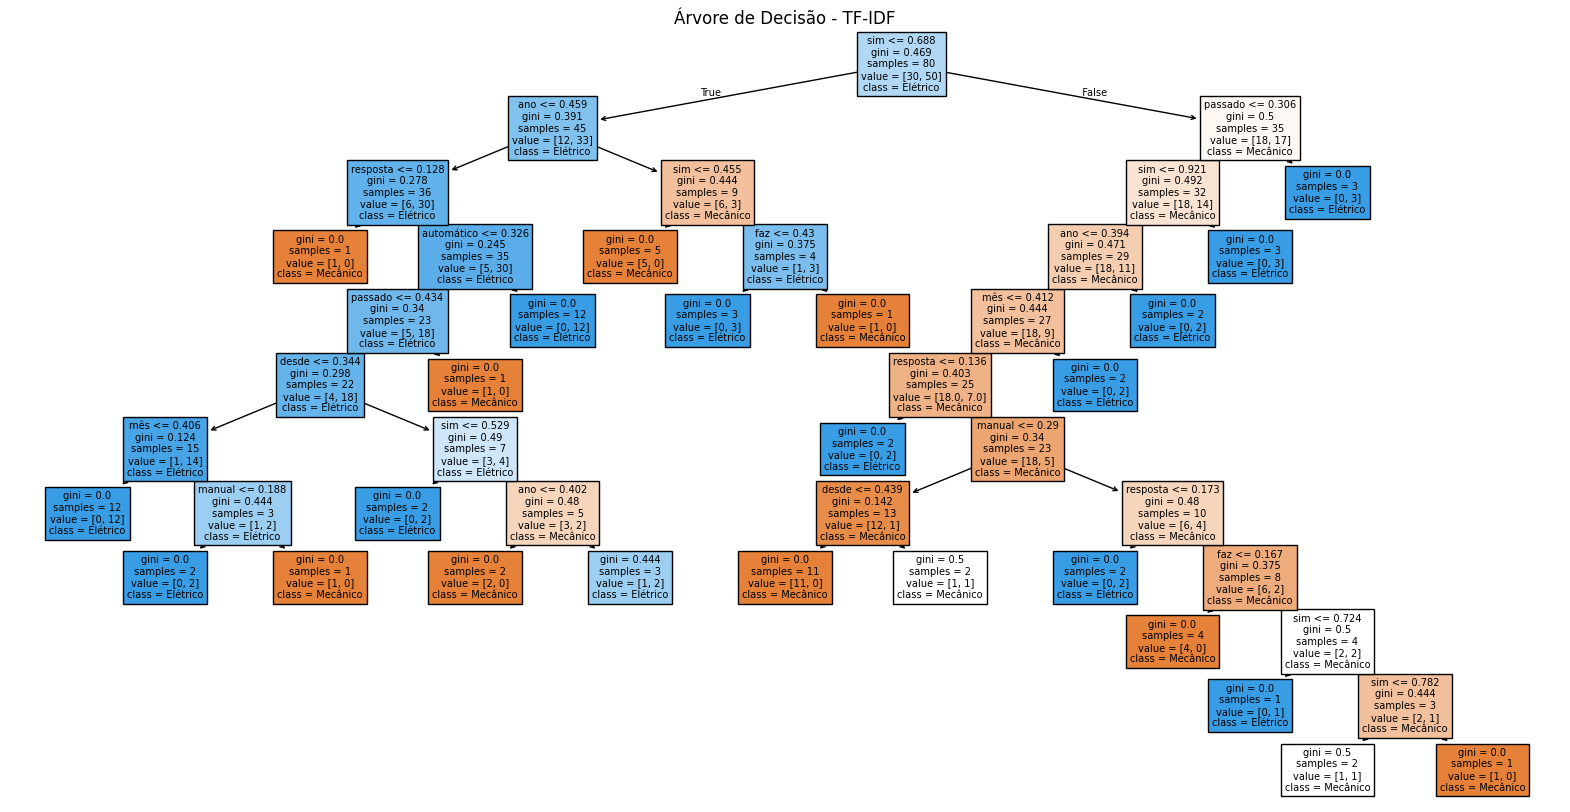

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão graficamente para o modelo treinado com TF-IDF
plt.figure(figsize=(20, 10))
plot_tree(modelo_tfidf, filled=True, feature_names=vectorizer_tfidf.get_feature_names_out(), class_names=y.unique().astype(str))
plt.title("Árvore de Decisão - TF-IDF")
plt.show()

## Passo 6 - Avaliação do Modelo

Depois de treinar o modelo, realizaremos previsões no conjunto de teste e analisaremos seu desempenho com base nas duas representações.

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões no conjunto de teste usando TF-IDF
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Avaliar o modelo com TF-IDF
print("\nRelatório de Classificação (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

print("\nAcurácia do modelo (TF-IDF):")
print(accuracy_score(y_test, y_pred_tfidf))



Relatório de Classificação (TF-IDF):
              precision    recall  f1-score   support

    Elétrico       0.54      0.64      0.58        11
    Mecânico       0.43      0.33      0.38         9

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.49      0.50      0.49        20


Acurácia do modelo (TF-IDF):
0.5


In [17]:
# Nova amostra de conversa simulada
nova_conversa = {
    'Qual o modelo do seu veículo?': 'Ford Focus',
    'Local onde aconteceu o problema?': 'Em frente à minha casa',
    'Há quanto tempo esse problema começou a acontecer?': 'Ontem à noite.',
    'O problema acontece de forma esporádica ou é constante?': 'C',
    'Você ouviu algum barulho estranho vindo do carro?': 'Sim, há um clique.',
    'O motor perdeu potência em algum momento?': 'Não sei.',
    'Quando foi a última vez que o veículo foi revisado?': 'Há 3 meses.',
    'Você sentiu cheiro de combustível dentro do carro?': 'Não.',
    'Está com dificuldade para ligar o carro?': 'Sim.',
    'Alguma luz de aviso no painel está acesa?': 'Sim, luz do motor.',
    'Você notou algum tipo de fluido vazando embaixo do carro?': 'Não',
    'Qual o problema do seu veículo?': 'O carro não está ligando.',
    'Revisão Agendada?': 'Não',
    'Problema Verificado?': 'Não',
    'Manual ou Automático?': 'Manual'
}

# Converter a nova conversa em um DataFrame
nova_conversa_df = pd.DataFrame([nova_conversa])

# Concatenar as colunas da nova conversa para criar uma representação unificada
nova_conversa_df['texto_unificado'] = nova_conversa_df.apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Converter o texto da nova conversa para TF-IDF
try:
  nova_conversa_tfidf = vectorizer_tfidf.transform(nova_conversa_df['texto_unificado'])

  # Fazer a previsão usando o modelo treinado
  predicao_nova_conversa = modelo_tfidf.predict(nova_conversa_tfidf)

  # Mostrar a previsão
  print(f"Tipo de problema identificado: {predicao_nova_conversa[0]}")
except Exception as e:
    print(f"Ocorreu um erro durante a previsão: {e}")

Tipo de problema identificado: Mecânico


##Passo 7 - Usando o modelo

Salvando o Modelo

In [18]:
import pickle

# Salva o modelo TF-IDF
with open('modelo_tfidf.pkl', 'wb') as modelo_file:
    pickle.dump(modelo_tfidf, modelo_file)

# Salva o vetor TF-IDF
with open('vetor_tfidf.pkl', 'wb') as vetor_file:
    pickle.dump(vectorizer_tfidf, vetor_file)

Carregando o Modelo

In [20]:
# Carregar o modelo e o vetor TF-IDF
with open('modelo_tfidf.pkl', 'rb') as modelo_file:
    modelo_tfidf = pickle.load(modelo_file)

with open('vetor_tfidf.pkl', 'rb') as vetor_file:
    vetor_tfidf = pickle.load(vetor_file)